# Loan Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('Loan Prediction.csv',header=None)
loan

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Adding Meaning Names to Columns

In [3]:
loan.columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant Income','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit History','Property_Area','Loan_Status']
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df=loan.set_index('Loan_ID')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## Exploratory Data Analysis

In [5]:
print('The Shape of the dataset is ',df.shape)

The Shape of the dataset is  (614, 12)


In [6]:
print('The columns of the dataset are ',df.columns)

The columns of the dataset are  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [7]:
print('The number of Duplicated rows in the dataset are ',df.duplicated().sum())

The number of Duplicated rows in the dataset are  0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   Applicant Income   614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   Loan_Amount        592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [9]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Applicant Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
print('The number of null values in the dataset are')
df.isnull().sum()

The number of null values in the dataset are


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
cat_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        cat_cols.append(x)
print('The Object data type columns are ',cat_cols)
num_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64' or df.dtypes[x]=='float64':
        num_cols.append(x)
print('The Numerical data type columns are ',num_cols)

The Object data type columns are  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
The Numerical data type columns are  ['Applicant Income', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term', 'Credit History']


In [12]:
df.nunique().to_frame('Unique Values')

,Unique Values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant Income,505
CoapplicantIncome,287
Loan_Amount,203
Loan_Amount_Term,10
Credit History,2


In [13]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('='*50)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [14]:
df.describe()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* Mean is greater than Median in Applicant Income,  CoapplicantIncome, Loan_Amount, So Right tailed Skewness is present.
* Median is greater than Mean in Loan_Amount_Term, Credit History.
* There is huge difference between 75th percentile and Max value in Applicant Income, CoapplicantIncome, Loan_Amount.

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Applicant Income,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
Loan_Amount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0
Credit History,564.0,NaN,NaN,NaN,0.842199,0.364878,0.0,1.0,1.0,1.0,1.0


In [16]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount']=df['Loan_Amount'].fillna(df['Loan_Amount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit History']=df['Credit History'].fillna(df['Credit History'].median())

In [17]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Visualization

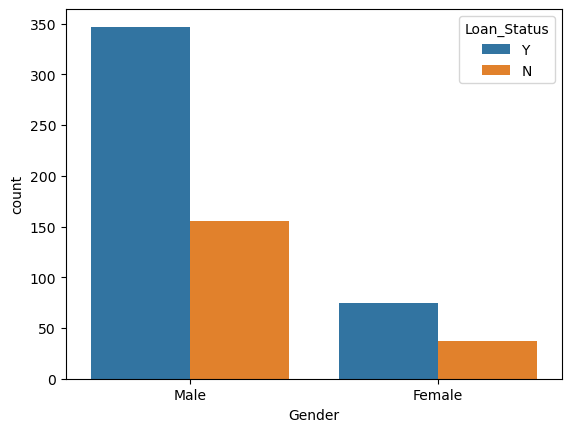

In [19]:
df['Gender'].value_counts()
sns.countplot(x='Gender',hue='Loan_Status',data=df[cat_cols])
plt.show()

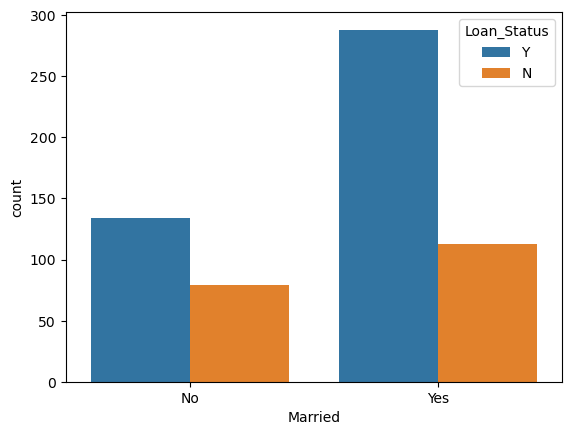

In [20]:
df['Married'].value_counts()
sns.countplot(x='Married',hue='Loan_Status',data=df[cat_cols])
plt.show()

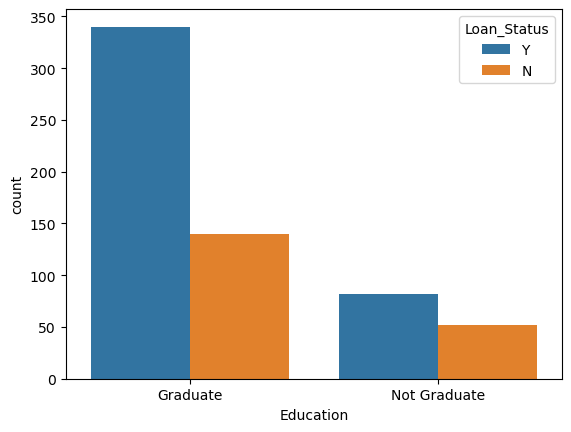

In [21]:
df['Education'].value_counts()
sns.countplot(x='Education',hue='Loan_Status',data=df[cat_cols])
plt.show()

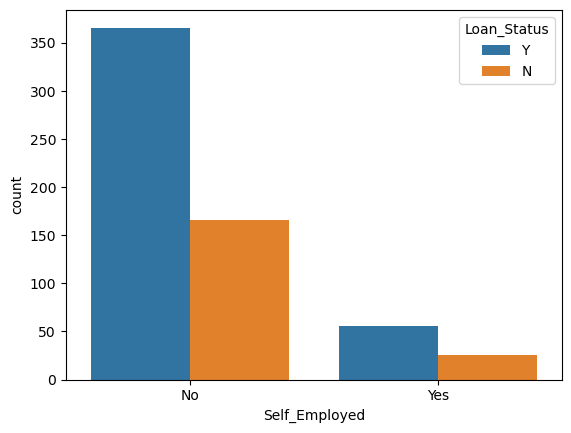

In [22]:
df['Self_Employed'].value_counts()
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df[cat_cols])
plt.show()

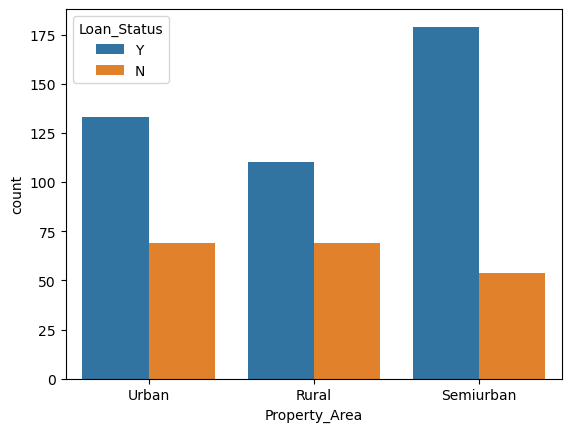

In [23]:
df['Property_Area'].value_counts()
sns.countplot(x='Property_Area',hue='Loan_Status',data=df[cat_cols])
plt.show()

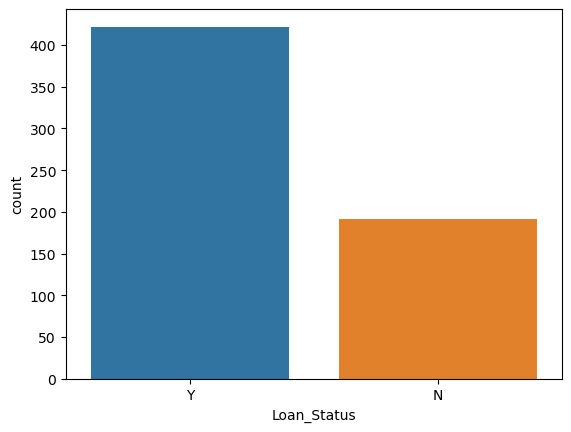

In [24]:
df['Loan_Status'].value_counts()
sns.countplot(x='Loan_Status',data=df[cat_cols])
plt.show()

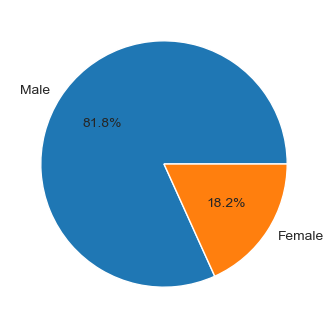

In [37]:
g_counts=df['Gender'].value_counts()
labels = g_counts.index.tolist()
counts = g_counts.values.tolist()

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

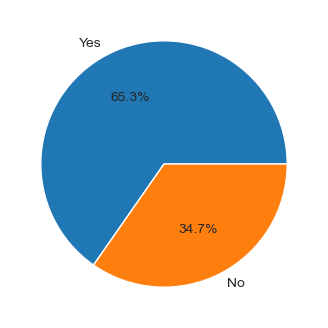

In [39]:
m_counts=df['Married'].value_counts()
labels=m_counts.index.tolist()
count=m_counts.values.tolist()
sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.show()

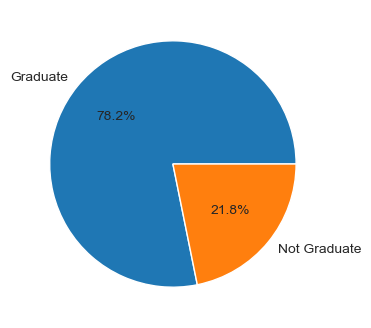

In [43]:
e_counts=df['Education'].value_counts()
labels=e_counts.index.tolist()
count=e_counts.values.tolist()
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
plt.pie(count,labels=labels,autopct='%1.1f%%')
plt.show()

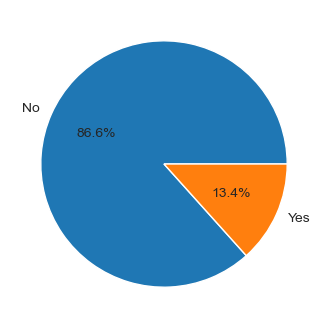

In [44]:
s_counts=df['Self_Employed'].value_counts()
labels=s_counts.index.tolist()
counts=s_counts.values.tolist()
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

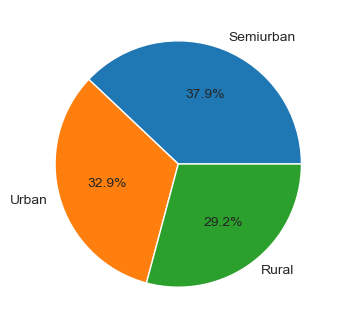

In [45]:
p_counts=df['Property_Area'].value_counts()
labels=p_counts.index.tolist()
counts=p_counts.values.tolist()
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

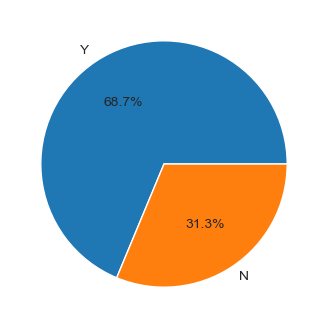

In [46]:
l_counts=df['Loan_Status'].value_counts()
labels=l_counts.index.tolist()
counts=l_counts.values.tolist()
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

## Bi-Variate Analysis

<AxesSubplot:xlabel='Applicant Income', ylabel='Loan_Amount'>

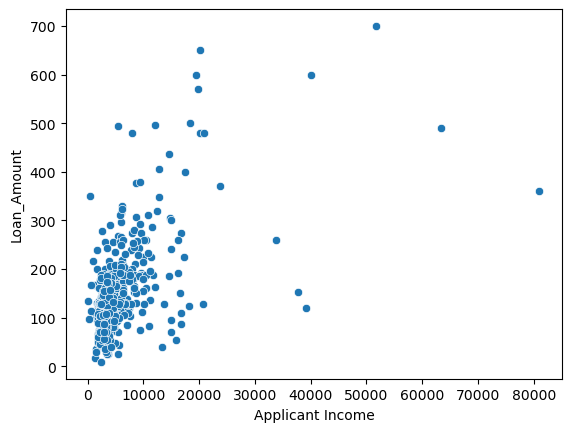

In [25]:
sns.scatterplot(x='Applicant Income',y='Loan_Amount',data=df)

<AxesSubplot:xlabel='Applicant Income', ylabel='CoapplicantIncome'>

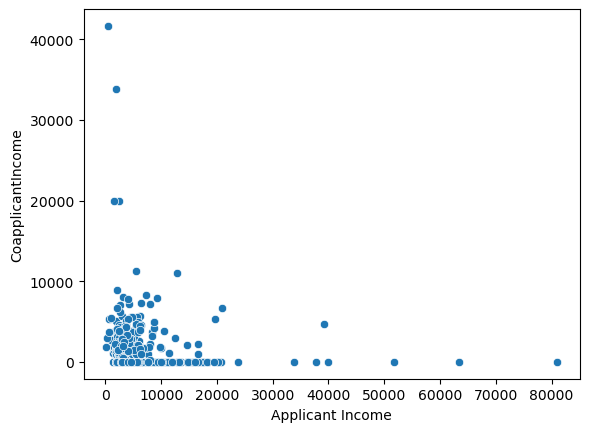

In [26]:
sns.scatterplot(x='Applicant Income',y='CoapplicantIncome',data=df)

<AxesSubplot:xlabel='Applicant Income', ylabel='Loan_Amount_Term'>

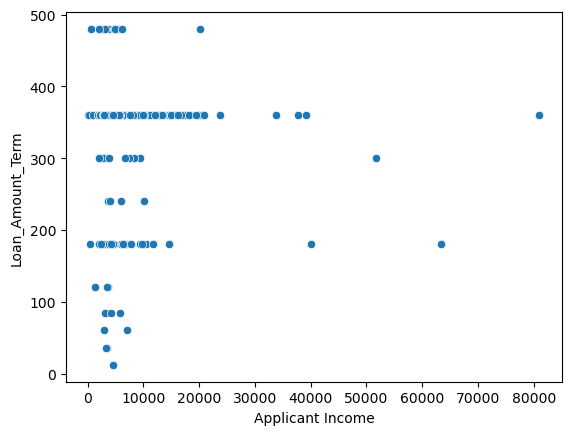

In [27]:
sns.scatterplot(x='Applicant Income',y='Loan_Amount_Term',data=df)

## Multi-Variate Analysis

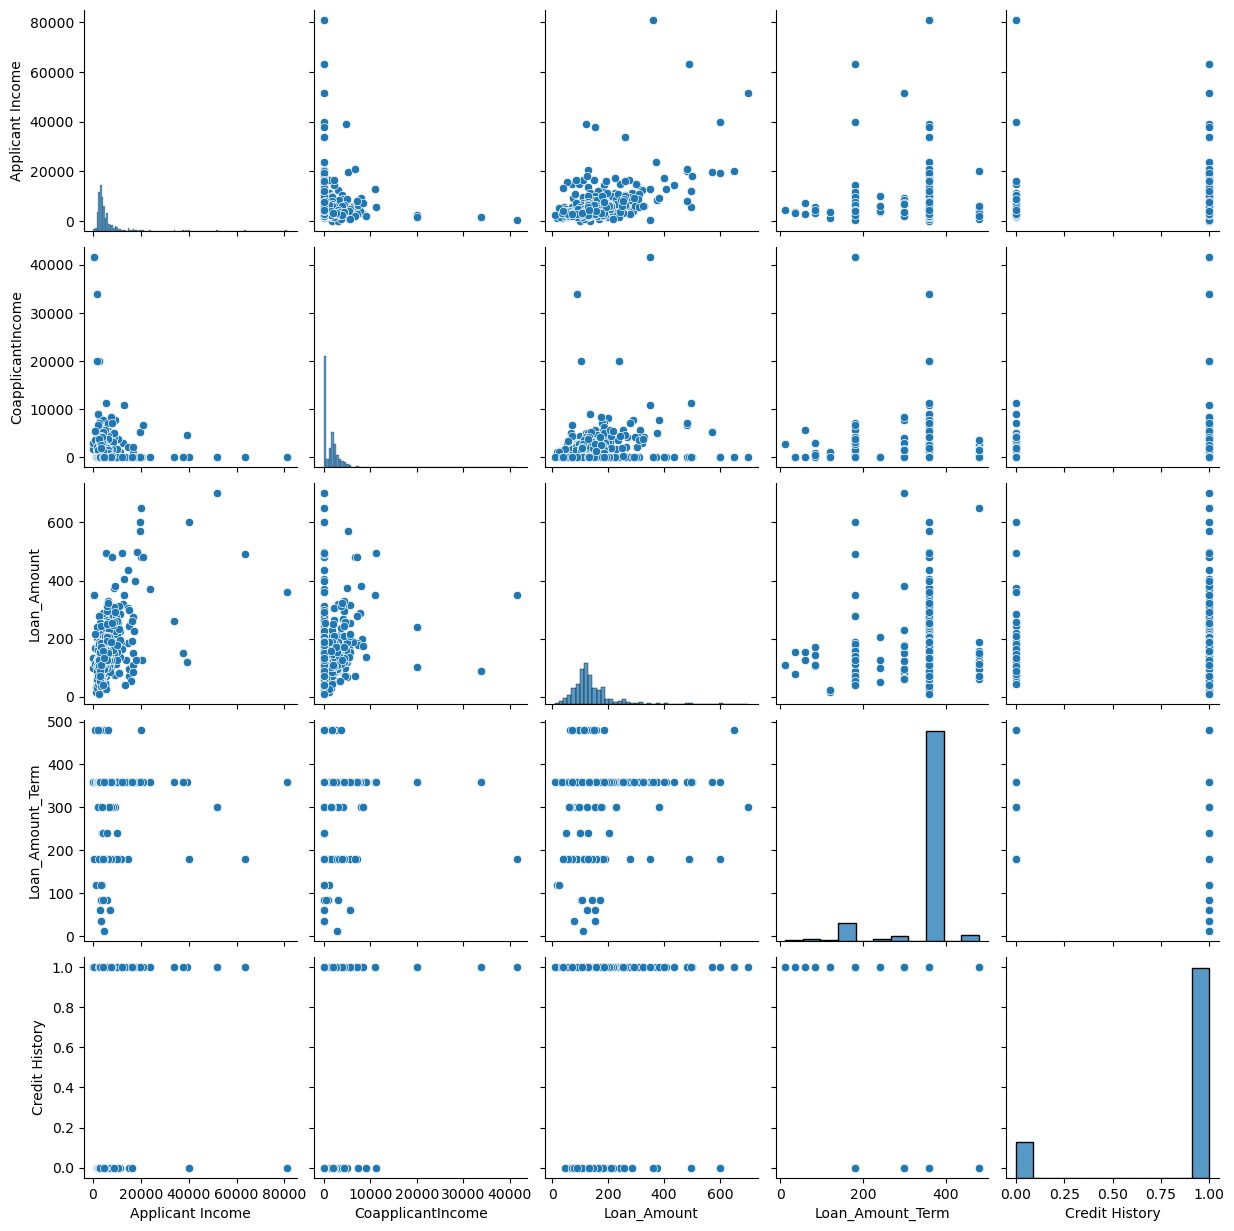

In [28]:
sns.pairplot(df)

## Detecting Outliers

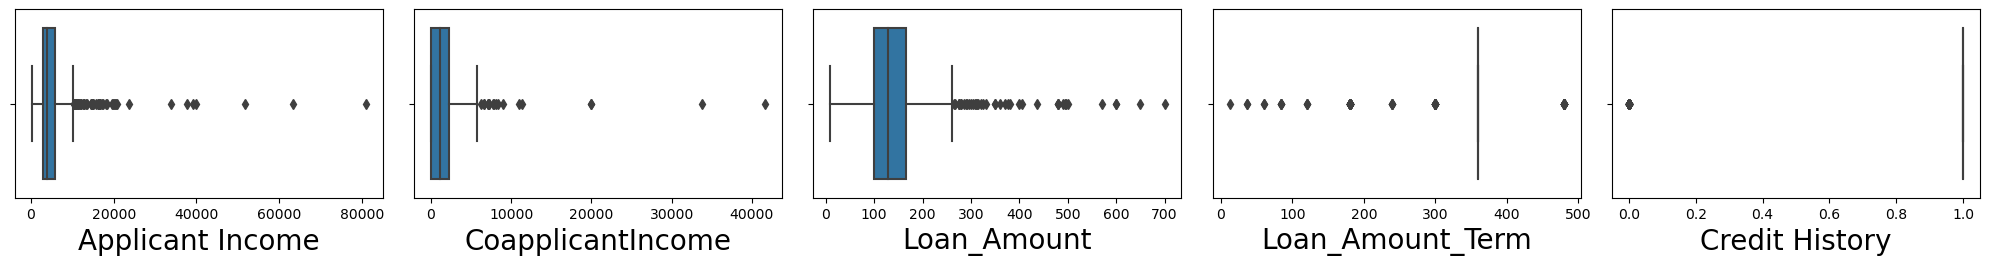

In [32]:
plt.figure(figsize=(20,10))
p=1

for col in df[num_cols]:
    if p<=20:
        ax=plt.subplot(4,5,p)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    p+=1
    
plt.tight_layout()

* Outliers Present in All Columns

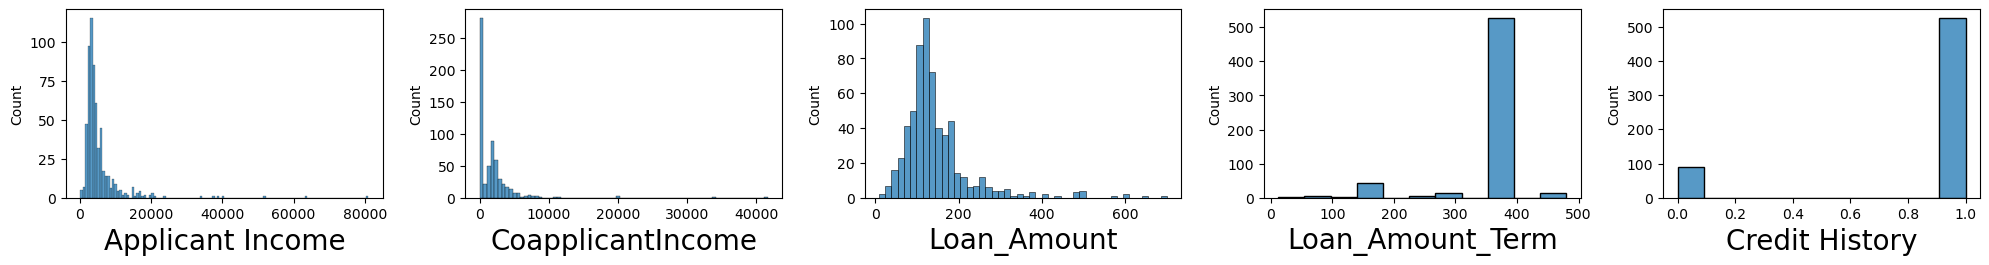

In [33]:
plt.figure(figsize=(20,10))
p=1

for col in df[num_cols]:
    if p<=20:
        plt.subplot(4,5,p)
        sns.histplot(df[col])
        plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()

* Skewness is present in All columns.

## Encoding Categorical Columns into Numerical Columns

In [35]:
le=LabelEncoder()
for cols in cat_cols:
    df[cols]=le.fit_transform(df[cols])

In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


## Removing Outliers using Z-Score Method

In [37]:
z=np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.211241,0.273231,0.411733,1.223298,0.674519
LP001003,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.211241,0.273231,0.411733,1.318513,1.482537
LP001005,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.948996,0.273231,0.411733,1.223298,0.674519
LP001006,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.306435,0.273231,0.411733,1.223298,0.674519
LP001008,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.056551,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.889500,0.273231,0.411733,1.318513,0.674519
LP002979,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.258378,2.522836,0.411733,1.318513,0.674519
LP002983,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.276168,0.273231,0.411733,1.223298,0.674519


In [38]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [40]:
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


In [42]:
print('Data Loss Percentage after removing Outliers using Z-Score method ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing Outliers using Z-Score method  6.026058631921824


## Removing Ouliers Using IQR Method

In [44]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [45]:
print('Data Loss Percentage after removing Outliers IQR method ',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing Outliers IQR method  66.28664495114006


* Iam choosing z-score method because of its less data loss.

## Detecting and Removing Skewness

In [46]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
Applicant Income     2.148522
CoapplicantIncome    1.350517
Loan_Amount          1.151525
Loan_Amount_Term    -2.098806
Credit History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

## Correlation Map

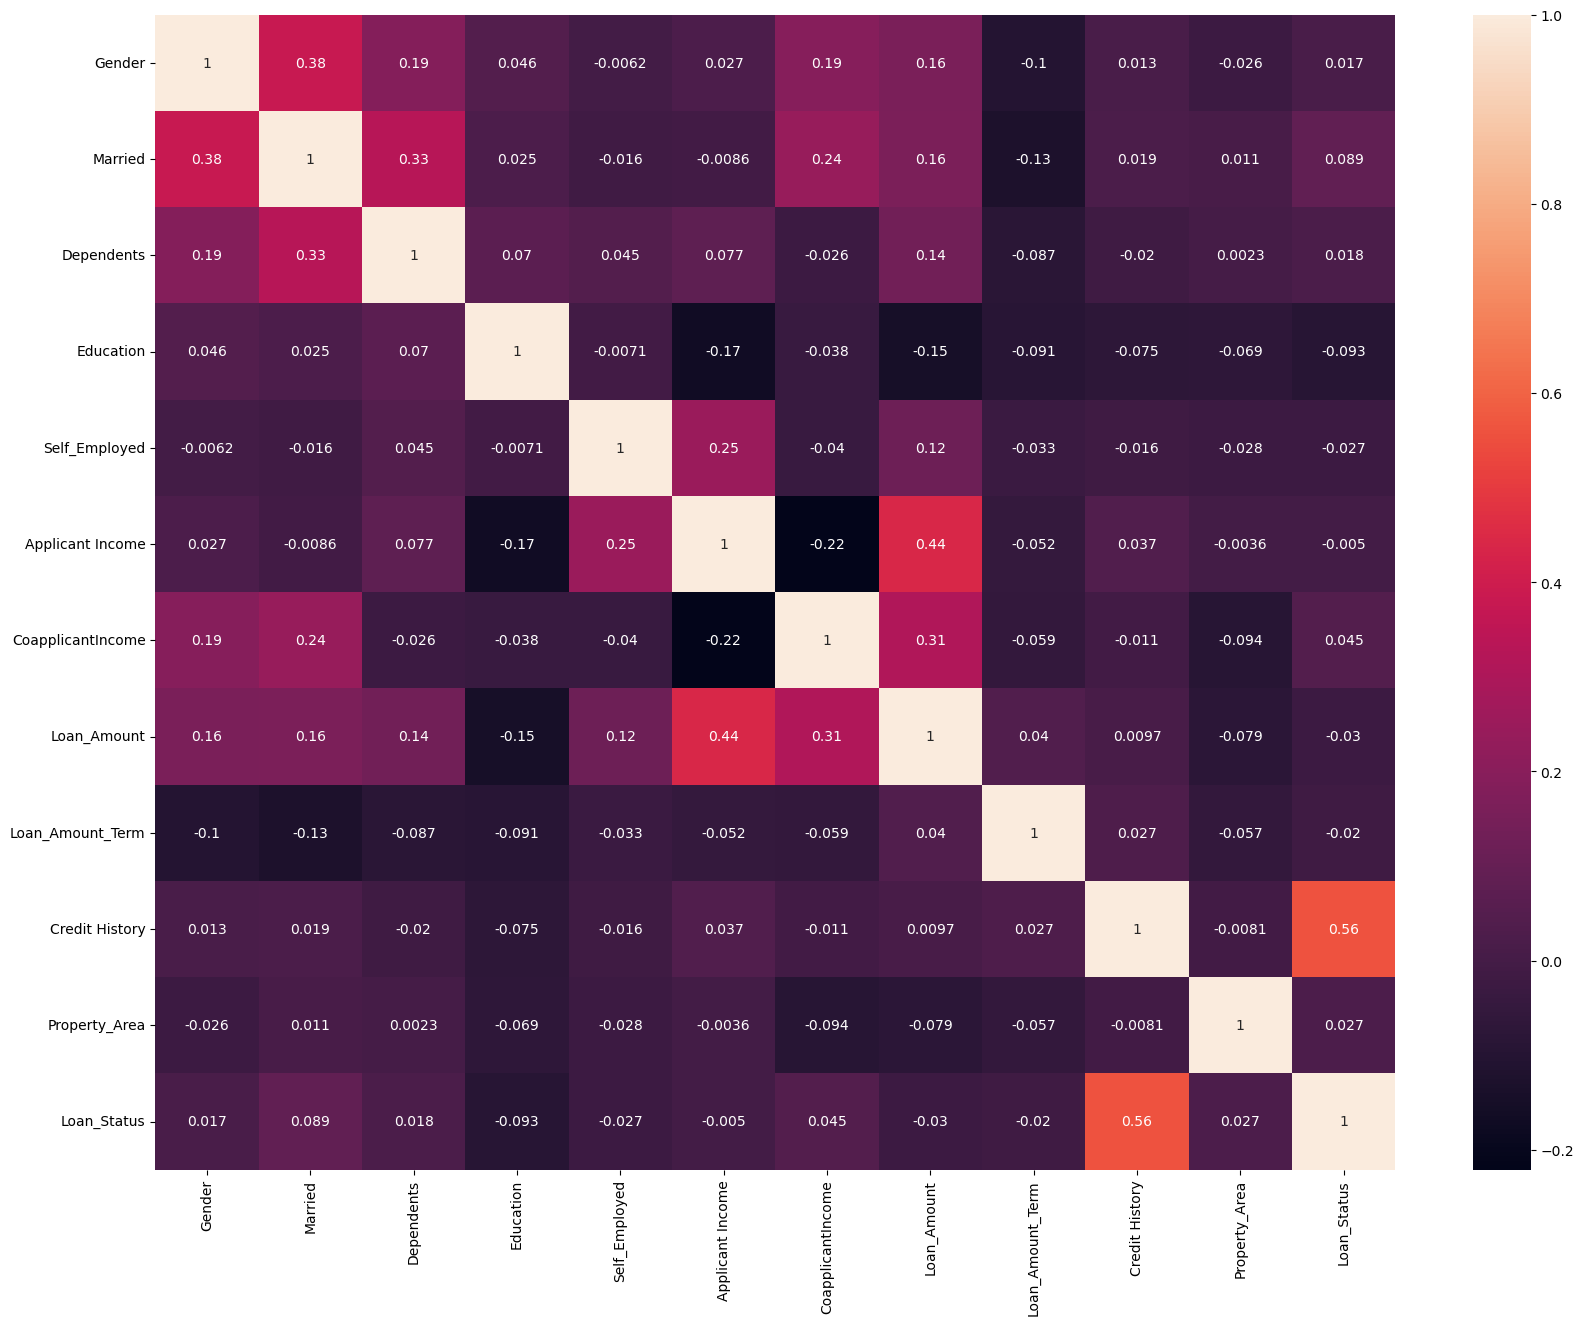

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)
plt.show()

* Applicant Income is negatively correlated with Coapplicant Income.

## Feature Selection

In [50]:
x=df1.drop('Loan_Status',axis=1)
y=df1['Loan_Status']

In [51]:
x.shape,y.shape

((577, 11), (577,))

## Feature Engineering

In [52]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.399266,-0.861036,-0.130895,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,-0.028020,0.052840,-0.130895,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.562297,-0.861036,-1.235554,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.703039,0.567956,-0.273432,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.450230,-0.861036,0.100727,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.596048,-0.861036,-1.146468,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.189012,-0.861036,-1.698797,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.149549,-0.715592,2.096238,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,0.984507,-0.861036,0.920312,0.230853,0.418513,1.227472


In [53]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF values
0,Gender,1.205206
1,Married,1.341284
2,Dependents,1.174161
3,Education,1.072993
4,Self_Employed,1.072247
5,Applicant Income,1.625897
6,CoapplicantIncome,1.456240
7,Loan_Amount,1.662005
8,Loan_Amount_Term,1.059945
9,Credit History,1.009328


In [54]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [56]:
sm=SMOTE()
X,Y=sm.fit_resample(x,y)

In [57]:
X.shape,Y.shape

((796, 11), (796,))

In [58]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

## Finding Best Random State to build our Classification Models

In [59]:
maxAcc=0
maxRs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        Rs=i
print('Best Score ',maxAcc)
print('Best Random State ',Rs)

Best Score  0.7949790794979079
Best Random State  86


## Splitting the data

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=86)

In [61]:
print('Size of x_train :',x_train.shape)
print('Size of x_test :',x_test.shape)
print('Size of y_train :',y_train.shape)
print('Size of y_test :',y_test.shape)

Size of x_train : (557, 11)
Size of x_test : (239, 11)
Size of y_train : (557,)
Size of y_test : (239,)


## Machine Learning Models for Classification

In [68]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=86)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=accuracy_score(y_test,pred)*100
    print('Accuracy Score :',acc_score)
    con_matrix=confusion_matrix(y_test,pred)
    print('Confusion Matrix :',con_matrix)
    class_report=classification_report(y_test,pred)
    print('Classification Report :',class_report)
    cv_score=(cross_val_score(clf,X,Y,cv=5).mean()*100)
    print('Cross-validation Score :',cv_score)
    result=acc_score-cv_score
    print('Result :',result)

## Logistic Regression

In [69]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score : 79.49790794979079
Confusion Matrix : [[ 65  38]
 [ 11 125]]
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.63      0.73       103
           1       0.77      0.92      0.84       136

    accuracy                           0.79       239
   macro avg       0.81      0.78      0.78       239
weighted avg       0.80      0.79      0.79       239

Cross-validation Score : 72.99292452830188
Result : 6.504983421488902


## Decision Tree Classifier

In [70]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score : 80.75313807531381
Confusion Matrix : [[ 86  17]
 [ 29 107]]
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.83      0.79       103
           1       0.86      0.79      0.82       136

    accuracy                           0.81       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239

Cross-validation Score : 77.39150943396227
Result : 3.361628641351544


## SVC

In [71]:
clf=SVC()
classify(clf,x,y)

Accuracy Score : 79.07949790794979
Confusion Matrix : [[ 76  27]
 [ 23 113]]
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.74      0.75       103
           1       0.81      0.83      0.82       136

    accuracy                           0.79       239
   macro avg       0.79      0.78      0.79       239
weighted avg       0.79      0.79      0.79       239

Cross-validation Score : 72.86949685534591
Result : 6.210001052603872


## KNeighbors Classifier

In [72]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score : 76.56903765690377
Confusion Matrix : [[88 15]
 [41 95]]
Classification Report :               precision    recall  f1-score   support

           0       0.68      0.85      0.76       103
           1       0.86      0.70      0.77       136

    accuracy                           0.77       239
   macro avg       0.77      0.78      0.77       239
weighted avg       0.79      0.77      0.77       239

Cross-validation Score : 77.76886792452831
Result : -1.1998302676245345


## Gradient Boosting Classifier

In [73]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score : 83.68200836820083
Confusion Matrix : [[ 83  20]
 [ 19 117]]
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.81      0.81       103
           1       0.85      0.86      0.86       136

    accuracy                           0.84       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.84      0.84      0.84       239

Cross-validation Score : 79.78380503144655
Result : 3.8982033367542783


## Ada Boost Classifier

In [74]:
clf=AdaBoostClassifier()
classify(clf,x,y)

Accuracy Score : 81.58995815899581
Confusion Matrix : [[ 79  24]
 [ 20 116]]
Classification Report :               precision    recall  f1-score   support

           0       0.80      0.77      0.78       103
           1       0.83      0.85      0.84       136

    accuracy                           0.82       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.82      0.82      0.82       239

Cross-validation Score : 76.14072327044026
Result : 5.4492348885555515


## Random Forest Classifier

In [75]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score : 84.93723849372385
Confusion Matrix : [[ 85  18]
 [ 18 118]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.87      0.87      0.87       136

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239

Cross-validation Score : 83.1745283018868
Result : 1.7627101918370585


## XG Boost Classifier

In [76]:
clf=xg.XGBClassifier()
classify(clf,x,y)

Accuracy Score : 82.84518828451883
Confusion Matrix : [[ 86  17]
 [ 24 112]]
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.83      0.81       103
           1       0.87      0.82      0.85       136

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239

Cross-validation Score : 81.5432389937107
Result : 1.3019492908081247


From the above evaluation metrics,We are choosing Random Forest Classifier as final model because of its F1 Score.

In [78]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,pred)*100)
print('Confusion matrix :',confusion_matrix(y_test,pred))
print('Classification Report :',classification_report(y_test,pred))

Accuracy Score : 84.93723849372385
Confusion matrix : [[ 85  18]
 [ 18 118]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.87      0.87      0.87       136

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239



## Hyper Parameter Tuning For finding best Parameters

In [79]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [200,500],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6],
    'criterion':['gini','entropy']
}
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=2)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 6],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [200, 500]})

In [80]:
print('Best Score:',grid_search.best_score_*100)
print('Best estimator:',grid_search.best_estimator_)
print('Best parameters:', grid_search.best_params_)

Best Score: 72.88878574559708
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.7,
                       n_estimators=200)
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.7, 'n_estimators': 200}


In [81]:
rf_final=RandomForestClassifier(criterion='entropy',max_depth=6,max_features=0.7,bootstrap=True,n_estimators=200)
rf_final.fit(x_train,y_train)
pred_rf=rf_final.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred_rf)*100)
print('Confusion Matrix:',confusion_matrix(y_test,pred_rf))
print('Classification Report:',classification_report(y_test,pred_rf))

Accuracy Score: 83.26359832635984
Confusion Matrix: [[ 80  23]
 [ 17 119]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.78      0.80       103
           1       0.84      0.88      0.86       136

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239



## AUC ROC Curve

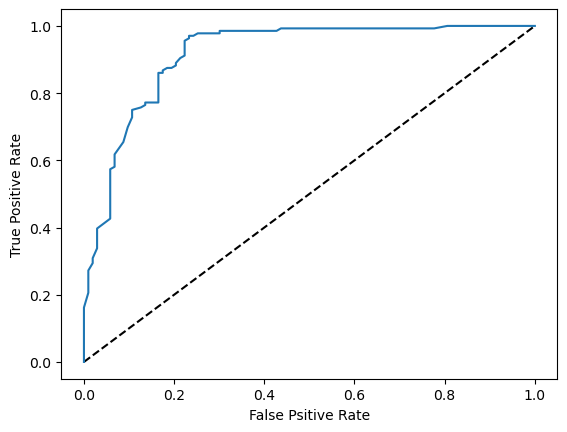

Score: 84.64448886350657


In [82]:
y_pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Psitive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score*100)

## Confusion Matrix

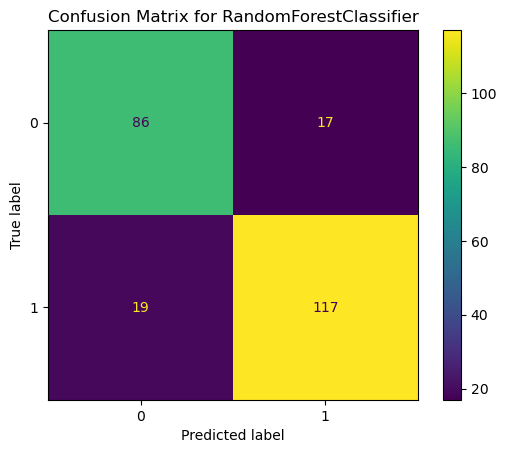

In [83]:
class_names=df1.columns
metrics.plot_confusion_matrix(rf.fit(x_train,y_train),x_test,y_test)
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## Saving The Model

In [84]:
import pickle

In [85]:
filename='Loan Prediction Project.pkl'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open('Loan Prediction Project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.93723849372385


In [86]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,1,1,1,0,1,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0
Original,1,1,1,0,1,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0


## Conclusion

* Male Candidates has the highest applications 81.8%.
* Married persons are getting more loan than Unmarried i.e 65.3%.
* Graduates are applying More loan than non-graduates i.e. 78.2%
* Non-Self Employed persons are getting loan i.e.86.6%.
* Semi-Urban peoples are applying for loan when comparing to urban and rural i.e.37.9%, Urban is next to that 32.9%.
* Built the several machine learning models.
* Random Forest Classifier has the highest f1 score 84.9%.